# Klasifikasi Obesitas menggunakan KNN

## Dibuat oleh : Dion Marcelino

In [ ]:
import pandas as pd
dataset_file="https://raw.githubusercontent.com/dionmarcelino/UAS-AI/refs/heads/main/Dataset/Obesity%20Classification.csv"
data=pd.read_csv(dataset_file)
data.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


## Cek Duplikasi dan Data Kosong

In [ ]:
#Cek duplikasi
print(f"Terdapat data duplikasi sebanyak {data.duplicated().sum()} baris")

Terdapat data duplikasi sebanyak 0 baris


In [ ]:
#Cek data kosong
data.isna().sum()

,0
ID,0
Age,0
Gender,0
Height,0
Weight,0
BMI,0
Label,0


## Mengatasi Duplikasi dan Data Kosong

In [ ]:
#Karena tidak ada baris yang duplikat, maka tidak harus ditangani
#Kalau ada data duplikat lakukan perintah
#data.drop_duplicates()

In [ ]:
#Hapus kolom yang terlalu banyak kosong(null) yaitu kolom 'BMI'
data.drop(columns=['BMI'],inplace=True)

KeyError: "['BMI'] not found in axis"

In [ ]:
#Imputasi data numerik yaitu kolom 'Age'
mean=data.Age.mean()
data.Age.fillna(int(mean),inplace=True)

<ipython-input-17-e1d226b9a9a1>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.Age.fillna(int(mean),inplace=True)


In [ ]:
#Imputasi data kategori yaitu kolom 'Label'
#Cek data yang paling sering muncul
data.Label.value_counts()

,count
Label,
Underweight,47
Normal Weight,29
Overweight,20
Obese,12


In [ ]:
#Berdasarkan data diatas, maka data yang sering muncul adalah 'Normal Weight'
data.Label.fillna('S',inplace=True)

<ipython-input-22-8b06792d8d9c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.Label.fillna('S',inplace=True)


In [ ]:
#Cek kembali data kosong
data.isna().sum()

,0
ID,0
Age,0
Gender,0
Height,0
Weight,0
Label,0


## Menentukan data target dan feature

In [ ]:
data.head()

,ID,Age,Gender,Height,Weight,Label
0,1,25,Male,175,80,Normal Weight
1,2,30,Female,160,60,Normal Weight
2,3,35,Male,180,90,Overweight
3,4,40,Female,150,50,Underweight
4,5,45,Male,190,100,Obese


In [ ]:
#target :Survived
#features : ID, Age, Gender, Height, Weight, Label

## Analisa data Target

In [ ]:
data.Age.value_counts()

,count
Age,
25,2
22,2
52,2
47,2
42,2
...,...
59,1
62,1
67,1


## Target vs Numeric (Age)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

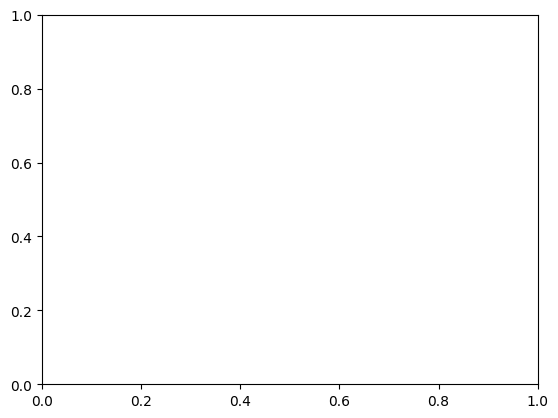

In [ ]:
sns.histplot(data.Age[data.Height==0], bins=[0,12,20,40,90], color='red', label='Tidak selamat',kde=True)
sns.histplot(data.Age[data.Height==1], bins=[0,12,20,40,90], color='green', label='Selamat',kde=True);

## Target vs Numeric (Fare)

In [ ]:
plt.figure(Age=(8,5))
sns.histplot(data.Label[data.Survived==0], bins=20,color='red', label='Tidak selamat', kde=True)
sns.histplot(data.Labeldata.Survived==1], bins=20,color='green', label='Selamat', kde=True)

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (<ipython-input-34-940edb947238>, line 3)

## Target vs Categorical / Ordinal

In [ ]:
cate_cols=['Pclass','Sex','SibSp','Parch','Embarked']

fig, axs=plt.subplots(2,3,figsize=(16,6))

for col,ax in zip(cate_cols,axs.flatten()):
  sns.countplot(data=data,x=col,hue='Survived', ax=ax)